Machine Learning in Agriculture

Recently we have observed the emerging concept of smart farming that makes agriculture more efficient and effective with the help of high-precision algorithms. The mechanism that drives it is Machine Learning — the scientific field that gives machines the ability to learn without being strictly programmed. It has emerged together with big data technologies and high-performance computing to create new opportunities to unravel, quantify, and understand data intensive processes in agricultural operational environments.

Machine learning is everywhere throughout the whole growing and harvesting cycle. It begins with a seed being planted in the soil — from the soil preparation, seeds breeding and water feed measurement — and it ends when neural networks pick up the harvest determining the ripeness with the help of computer vision.

The Toxic Pesticides
Though, many of us don't appreciate much, but a farmer's job is real test of endurance and determination. Once the seeds are sown, he works days and nights to make sure that he cultivates a good harvest at the end of season. A good harvest is ensured by several factors such as availability of water, soil fertility, protecting crops from rodents, timely use of pesticides & other useful chemicals and nature. While a lot of these factors are difficult to control for, the amount and frequency of pesticides is something the farmer can control.

Pesticides are also special, because while they protect the crop with the right dosage. But, if you add more than required, they may spoil the entire harvest. A high level of pesticide can deem the crop dead / unsuitable for consumption among many outcomes. This data is based on crops harvested by various farmers at the end of harvest season. To simplify the problem, you can assume that all other factors like variations in farming techniques have been controlled for.

You need to determine the outcome of the harvest season, i.e. whether the crop would be healthy (alive), damaged by pesticides or damaged by other reasons.







Dataset 

Training set

https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/train_agriculture.xlsx

Testing set 

https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/test_agriculture.xlsx

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV
from sklearn.externals import joblib
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [92]:
agriculture= pd.read_excel('train_agriculture.xlsx')
agriculture.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [93]:
agriculture.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

In [94]:
agriculture.drop('ID', inplace=True,axis=1)
agriculture.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1


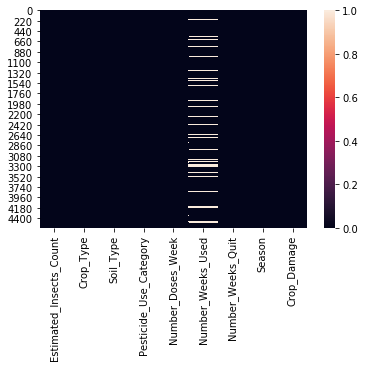

In [95]:
sns.heatmap(agriculture.isnull())

In [96]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan , strategy ='mean')
imputer.fit(agriculture.iloc[:,0:7])
agriculture.iloc[:,0:7] = imputer.transform(agriculture.iloc[:,0:7])

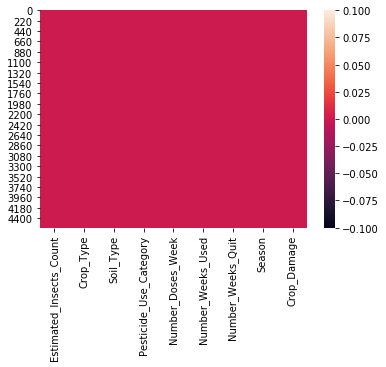

In [97]:
sns.heatmap(agriculture.isnull())

In [98]:
agriculture.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.891027,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,11.965785,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.891027,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,36.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000F5689C8>,
      dtype=object)

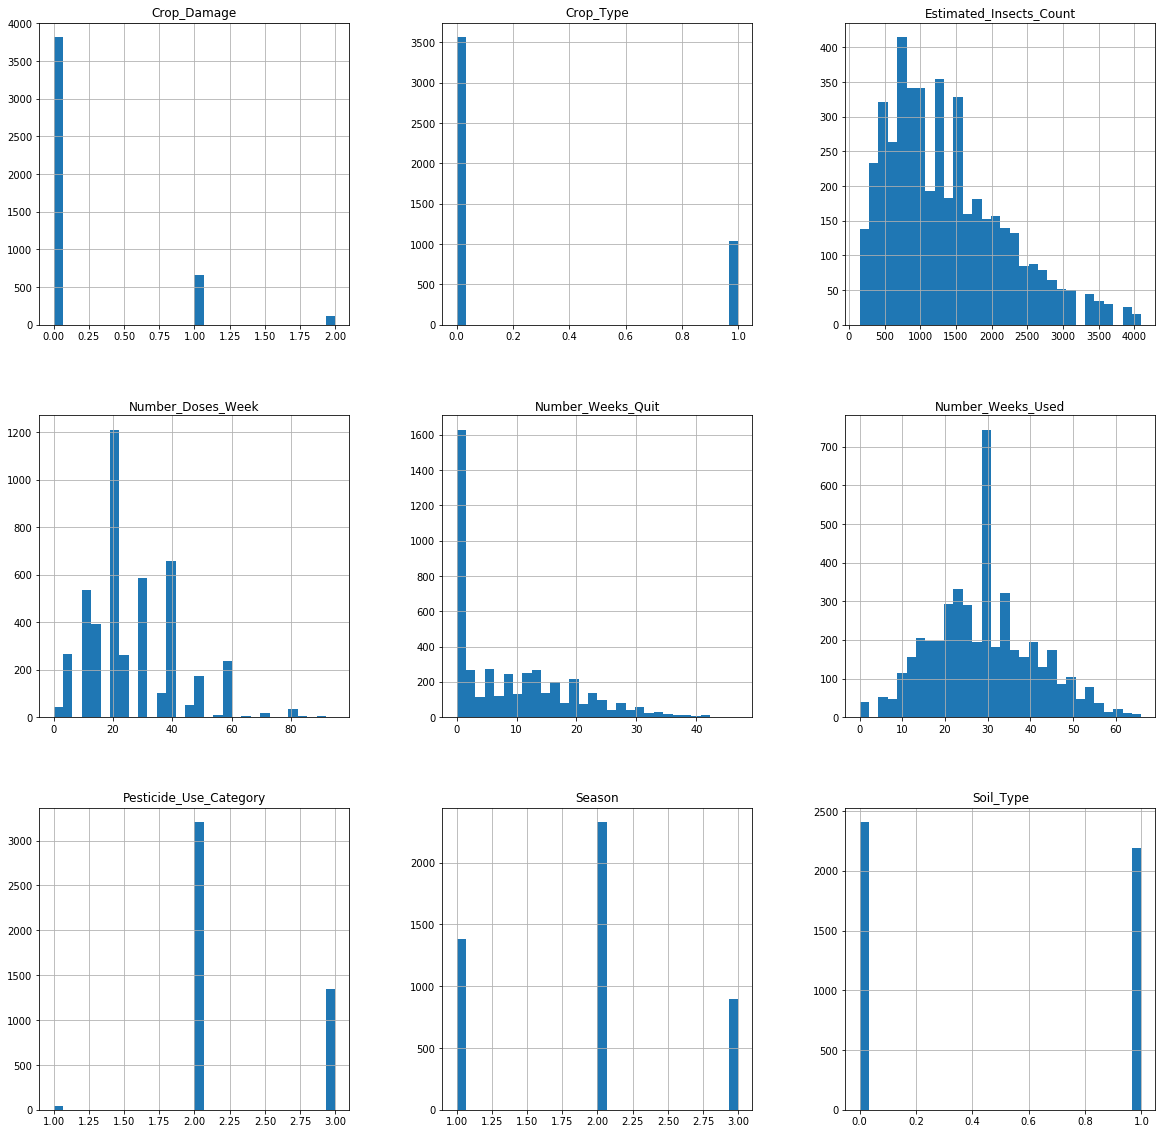

In [99]:
agriculture.hist(figsize=(20,20),grid=True,layout=(3,3),bins=30)

In [100]:
agriculture.skew()

Estimated_Insects_Count    0.911469
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category     0.678586
Number_Doses_Week          0.945895
Number_Weeks_Used          0.278664
Number_Weeks_Quit          0.919771
Season                     0.144841
Crop_Damage                2.306933
dtype: float64

In [101]:
skew=('Estimated_Insects_Count','Crop_Type','Soil_Type','Pesticide_Use_Category','Number_Weeks_Used','Number_Weeks_Used','Number_Weeks_Quit')
for col in skew:
    if agriculture.skew().loc[col]>0.55:
         agriculture[col]=np.log1p( agriculture[col])

In [102]:
agriculture.skew()

Estimated_Insects_Count   -0.498606
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category     0.416624
Number_Doses_Week          0.945895
Number_Weeks_Used          0.278664
Number_Weeks_Quit         -0.199671
Season                     0.144841
Crop_Damage                2.306933
dtype: float64

In [103]:
z=np.abs(zscore(agriculture))
threshhold=3
print(np.where(z>3))

(array([   0,    1,    2,    3,    4,    5,    6,    7,    7,    8,    9,
          9,   10,   11,   12,   13,   14,   14,   15,   16,   17,   18,
         19,   20,   21,   22,   23,   24,   25,   26,  100,  103,  112,
        149,  165,  166,  167,  179,  185,  186,  197,  207,  222,  223,
        242,  248,  252,  264,  265,  290,  296,  305,  316,  325,  346,
        351,  355,  361,  374,  375,  377,  385,  386,  387,  388,  389,
        390,  453,  458,  466,  480,  510,  517,  522,  557,  595,  612,
        634,  693,  807,  819,  855,  856,  911,  944,  978,  980,  998,
       1017, 1019, 1067, 1097, 1178, 1327, 1339, 1340, 1350, 1351, 1406,
       1443, 1457, 1489, 1523, 1589, 1652, 1654, 1737, 1807, 1868, 2019,
       2043, 2136, 2139, 2170, 2171, 2195, 2237, 2392, 2571, 2572, 2573,
       2574, 2575, 2576, 2577, 2578, 2579, 2580, 2581, 2582, 2583, 2584,
       2585, 2585, 2586, 2587, 2588, 2589, 2590, 2590, 2591, 2592, 2593,
       2594, 2595, 2596, 2597, 2615, 2663, 2671, 2

In [104]:
agriculture_new=agriculture[(z<3).all(axis=1)]
print(agriculture.shape,'\t',agriculture_new.shape)

(4599, 9) 	 (4368, 9)


[]

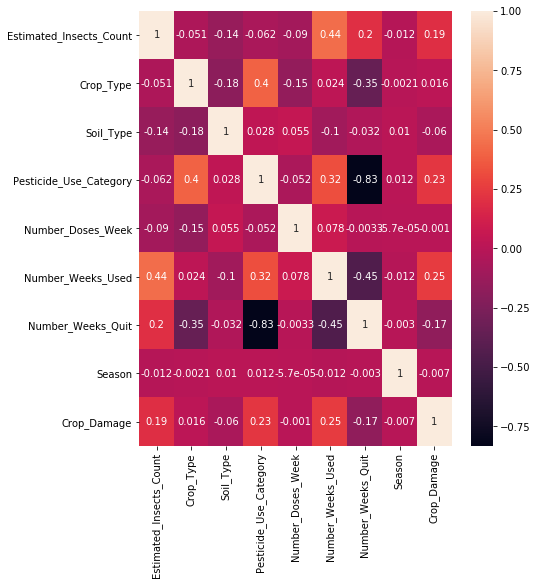

In [105]:
agriculture_cor=agriculture_new.corr()
plt.figure(figsize=(7,8))
sns.heatmap(agriculture_cor,annot=True)
plt.plot()

In [106]:
agriculture_new

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
27,5.129899,0.0,1.0,1.386294,20.0,14.000000,0.000000,2,0
28,5.129899,0.0,1.0,1.386294,20.0,15.000000,0.000000,2,1
29,5.241747,0.0,0.0,1.386294,25.0,19.000000,0.000000,1,0
30,5.241747,0.0,1.0,1.386294,40.0,24.000000,0.000000,3,0
31,5.347108,0.0,1.0,1.386294,20.0,8.000000,0.000000,3,0
...,...,...,...,...,...,...,...,...,...
4594,7.668094,0.0,1.0,1.098612,20.0,28.891027,0.693147,1,1
4595,7.668561,0.0,1.0,1.098612,30.0,47.000000,1.098612,1,1
4596,7.726654,0.0,1.0,1.098612,10.0,7.000000,3.332205,2,0
4597,7.726654,0.0,1.0,1.098612,10.0,20.000000,3.218876,2,0


In [107]:
x_train=agriculture_new.iloc[:,0:7].values
y_train=agriculture_new.iloc[:,-1].values

In [108]:
agriculture_test=pd.read_excel('test_agriculture.xlsx')
imputer.fit(agriculture_test.iloc[:,1:8])
agriculture_test.iloc[:,1:8] = imputer.transform(agriculture_test.iloc[:,1:8])
x_test=agriculture_test.iloc[:,1:8].values

In [109]:
KNN=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
KNN.fit(x_train,y_train)
predictionregion=KNN.predict(x_test)

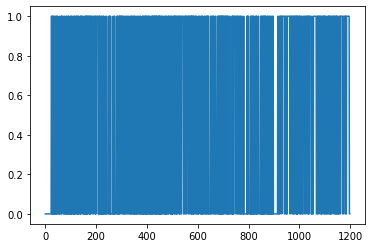

In [110]:
prediction = pd.Series(predictionregion)
prediction.plot.line()